In [1]:
import pandas as pd
import sqlite3
from IPython.display import display, HTML

In [2]:
conn = sqlite3.connect('imdb.db')

In [3]:
c = conn.cursor()

In [7]:
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type='table'",conn)
tables = tables["Table_Name"].values.tolist()

In [8]:
for table in tables:
    query = "PRAGMA TABLE_INFO({})".format(table)
    schema = pd.read_sql_query(query,conn)
    print("Schema of",table)
    display(schema)
    print("-"*100)
    print("\n")

Schema of Movie


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,title,TEXT,0,None,0
3,3,year,TEXT,0,None,0
4,4,rating,REAL,0,None,0
5,5,num_votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Genre


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,GID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Language


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,LAID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Country


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,CID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Location


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,Name,TEXT,0,None,0
2,2,LID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Location


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,LID,REAL,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Country


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,CID,REAL,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Language


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,LAID,INTEGER,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Genre


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,GID,INTEGER,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of Person


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,PID,TEXT,0,None,0
2,2,Name,TEXT,0,None,0
3,3,Gender,TEXT,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Producer


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Director


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Schema of M_Cast


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,MID,TEXT,0,None,0
2,2,PID,TEXT,0,None,0
3,3,ID,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




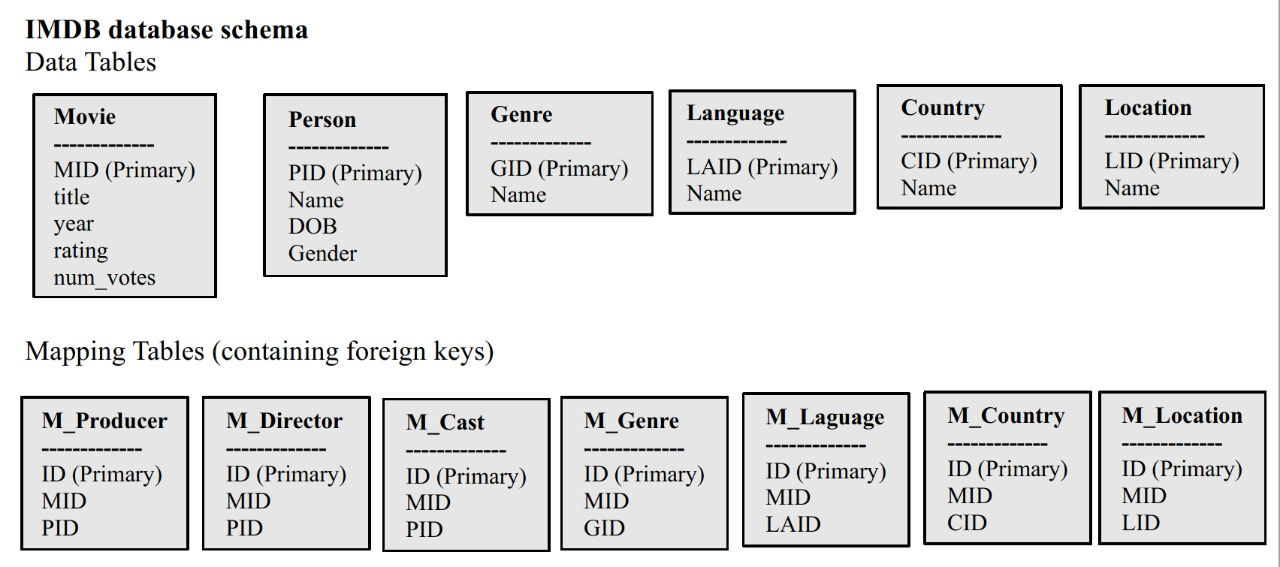


## Q1 --- List all the directors who directed a 'Comedy' movie in a leap year. (You need to check that the genre is 'Comedy’ and year is a leap year) Your query should return director name, the movie name, and the year.

### 1.Join movie director and person table

In [6]:

mdp = "SELECT * FROM Movie m LEFT JOIN M_Director md ON m.MID= md.MID  LEFT JOIN Person p ON md.PID=p.PID"
mdp_results = pd.read_sql_query(mdp,conn)
print(mdp_results.head(10))


   index        MID                       title  year  rating  num_votes  \
0      0  tt2388771                      Mowgli  2018     6.6      21967   
1      1  tt5164214               Ocean's Eight  2018     6.2     110861   
2      2  tt1365519                 Tomb Raider  2018     6.4     142585   
3      3  tt0848228                The Avengers  2012     8.1    1137529   
4      4  tt8239946                     Tumbbad  2018     8.5       7483   
5      5  tt7027278                   Kedarnath  2018     5.5       1970   
6      6  tt3498820  Captain America: Civil War  2016     7.8     536641   
7      7  tt8108198                   Andhadhun  2018     9.0      18160   
8      8  tt3741834                        Lion  2016     8.1     170216   
9      9  tt6747420                Rajma Chawal  2018     5.7        681   

   index        MID        PID  ID  index        PID              Name Gender  
0      0  tt2388771  nm0785227   0      4  nm0785227       Andy Serkis   Male  
1  

### 2.Join movie, director, person table with M_genere and Genre

In [7]:
#combining all the tables
t3  = '''SELECT * FROM Movie m LEFT JOIN M_Director md ON m.MID= md.MID  LEFT JOIN Person p ON md.PID=p.PID
    LEFT JOIN M_Genre mg ON m.MID= mg.MID LEFT JOIN Genre g ON mg.GID=g.GID 
'''
mdp_results = pd.read_sql_query(t3,conn)
print(mdp_results.head(10))


   index        MID                       title  year  rating  num_votes  \
0      0  tt2388771                      Mowgli  2018     6.6      21967   
1      1  tt5164214               Ocean's Eight  2018     6.2     110861   
2      2  tt1365519                 Tomb Raider  2018     6.4     142585   
3      3  tt0848228                The Avengers  2012     8.1    1137529   
4      4  tt8239946                     Tumbbad  2018     8.5       7483   
5      5  tt7027278                   Kedarnath  2018     5.5       1970   
6      6  tt3498820  Captain America: Civil War  2016     7.8     536641   
7      7  tt8108198                   Andhadhun  2018     9.0      18160   
8      8  tt3741834                        Lion  2016     8.1     170216   
9      9  tt6747420                Rajma Chawal  2018     5.7        681   

   index        MID        PID  ID  ...        PID              Name Gender  \
0      0  tt2388771  nm0785227   0  ...  nm0785227       Andy Serkis   Male   
1    

### 3.After combining all the table select movie= comedy

In [8]:
#combining all the tables where movie is comedy
t4  = '''SELECT * FROM Movie m LEFT JOIN M_Director md ON m.MID= md.MID  LEFT JOIN Person p ON md.PID=p.PID
    LEFT JOIN M_Genre mg ON m.MID= mg.MID LEFT JOIN Genre g ON mg.GID=g.GID WHERE g.Name LIKE '%Comedy%'
'''
mdp_results = pd.read_sql_query(t4,conn)
print(mdp_results.head(10))


   index        MID                   title  year  rating  num_votes  index  \
0      1  tt5164214           Ocean's Eight  2018     6.2     110861      1   
1      7  tt8108198               Andhadhun  2018     9.0      18160      7   
2      9  tt6747420            Rajma Chawal  2018     5.7        681      9   
3     13  tt3726012              Mastizaade  2016     2.4       2205     13   
4     18  tt2120120                  Pixels  2015     5.6     116089     18   
5     19  tt8108202                   Stree  2018     8.0      12996     19   
6     21  tt7725596              Badhaai Ho  2018     8.2       8418     21   
7     23  tt0838221  The Darjeeling Limited  2007     7.2     161266     23   
8     25  tt0286499    Bend It Like Beckham  2002     6.7      97876     25   
9     30  tt8396128                Pataakha  2018     7.3       1606     30   

         MID        PID  ID  ...        PID                       Name Gender  \
0  tt5164214  nm0002657   1  ...  nm0002657      

###  4.select names where movie is comedy and year is leap year

In [6]:

%%time
def grader_1(q1):
    q1_results  = pd.read_sql_query(q1,conn)
    print(q1_results.head(10))
    assert (q1_results.shape == (232,3))

query1 = '''SELECT p.Name AS 'Director name',title AS 'Movie name',year FROM Movie m LEFT JOIN M_Director md ON m.MID= md.MID  LEFT JOIN Person p ON md.PID=p.PID
    LEFT JOIN M_Genre mg ON m.MID= mg.MID LEFT JOIN Genre g ON mg.GID=g.GID WHERE g.Name LIKE '%Comedy%'
    AND ((year%400==0) OR (year%4==0 AND year%100!=0))
'''
grader_1(query1)


       Director name                         Movie name    year
0       Milap Zaveri                         Mastizaade    2016
1       Danny Leiner  Harold & Kumar Go to White Castle    2004
2     Anurag Kashyap                 Gangs of Wasseypur    2012
3       Frank Coraci        Around the World in 80 Days    2004
4      Griffin Dunne             The Accidental Husband    2008
5        Anurag Basu                             Barfi!    2012
6    Gurinder Chadha                  Bride & Prejudice    2004
7         Mike Judge    Beavis and Butt-Head Do America    1996
8        Abhinay Deo                          Blackmail  I 2018
9   Tarun Mansukhani                            Dostana    2008


AssertionError: 

## Q2 --- List the names of all the actors who played in the movie 'Anand' (1971)

In [7]:
%%time
def grader_2(q2):
    q2_results  = pd.read_sql_query(q2,conn)
    print(q2_results.head(10))
    assert (q2_results.shape == (17,1))


query2 = '''SELECT p.Name AS 'Actor Name in Movie Anand'
FROM Person p WHERE p.PID IN
    (SELECT TRIM(mc.PID)
    FROM M_Cast mc JOIN Movie m
    ON mc.MID = m.MID
    WHERE m.title = 'Anand')
'''

grader_2(query2)

  Actor Name in Movie Anand
0          Amitabh Bachchan
1             Rajesh Khanna
2             Sumita Sanyal
3                Ramesh Deo
4                 Seema Deo
5            Asit Kumar Sen
6                Dev Kishan
7              Atam Prakash
8             Lalita Kumari
9                    Savita
Wall time: 802 ms


## Q3 --- List all the actors who acted in a film before 1970 and in a film after 1990. (That is: < 1970 and > 1990.)

In [8]:
%%time

def grader_3a(query_less_1970, query_more_1990):
    q3_a = pd.read_sql_query(query_less_1970,conn)
    print(q3_a.shape)
    q3_b = pd.read_sql_query(query_more_1990,conn)
    print(q3_b.shape)
    return (q3_a.shape == (4942,1)) and (q3_b.shape == (62570,1))

query_less_1970 =""" 
SELECT p.Name
FROM Person p 
JOIN M_Cast mc on p.PID = TRIM(mc.PID) 
JOIN Movie m ON mc.MID = m.MID
WHERE m.year < 1970
"""
query_more_1990 =""" 
SELECT p.Name
FROM Person p 
JOIN M_Cast mc on p.PID = TRIM(mc.PID) 
JOIN Movie m ON mc.MID = m.MID
WHERE m.year > 1990
"""
print(grader_3a(query_less_1970, query_more_1990))

# using the above two queries, you can find the answer to the given question 

(4880, 1)
(62867, 1)
False
Wall time: 4.15 s


In [9]:
%%time
def grader_3(q3):
    q3_results  = pd.read_sql_query(q3,conn)
    print(q3_results.head(10))
    assert (q3_results.shape == (300,1))

query3 = '''SELECT p.Name
FROM Person p 
JOIN M_Cast mc on p.PID = TRIM(mc.PID) 
JOIN Movie m ON mc.MID = m.MID
WHERE m.year < 1970
INTERSECT
SELECT p.Name
FROM Person p 
JOIN M_Cast mc on p.PID = TRIM(mc.PID) 
JOIN Movie m ON mc.MID = m.MID
WHERE m.year > 1990
'''

grader_3(query3)

                 Name
0         A.K. Hangal
1      Aachi Manorama
2               Abbas
3               Abdul
4   Abhi Bhattacharya
5    Abhimanyu Sharma
6      Achala Sachdev
7                Adil
8                Ajay
9                Ajit


AssertionError: 

## Q4 --- List all directors who directed 10 movies or more, in descending order of the number of movies they directed. Return the directors' names and the number of movies each of them directed.

In [10]:
%%time

def grader_4a(query_4a):
    query_4a = pd.read_sql_query(query_4a,conn)
    print(query_4a.head(10)) 
    return (query_4a.shape == (1462,2))

query_4a = '''

SELECT md.PID Direction_ID, COUNT(m.MID) Movie_Count FROM M_Director md JOIN Person p ON md.PID= p.PID JOIN Movie m ON m.MID=md.MID
GROUP BY p.PID

'''


print(grader_4a(query_4a))

# using the above query, you can write the answer to the given question

  Direction_ID  Movie_Count
0    nm0000180            1
1    nm0000187            1
2    nm0000229            1
3    nm0000269            1
4    nm0000386            1
5    nm0000487            2
6    nm0000965            1
7    nm0001060            1
8    nm0001162            1
9    nm0001241            1
True
Wall time: 198 ms


In [11]:
%%time
def grader_4(q4):
    q4_results  = pd.read_sql_query(q4,conn)
    print(q4_results.head(10))
    assert (q4_results.shape == (58,2))

query4 = '''SELECT p.Name AS 'Movie Director', COUNT(md.PID) movie_count
            FROM Person p 
            JOIN M_Director md
            ON p.PID = md.PID
            GROUP BY md.PID
            HAVING movie_count > 9
            ORDER BY movie_count
            DESC'''

grader_4(query4)

          Movie Director  movie_count
0           David Dhawan           39
1           Mahesh Bhatt           35
2        Ram Gopal Varma           30
3           Priyadarshan           30
4           Vikram Bhatt           29
5   Hrishikesh Mukherjee           27
6            Yash Chopra           21
7         Shakti Samanta           19
8        Basu Chatterjee           19
9           Subhash Ghai           18
Wall time: 110 ms


## Q5.a --- For each year, count the number of movies in that year that had only female actors.

In [12]:
%%time

# note that you don't need TRIM for person table

def grader_5aa(query_5aa):
    query_5aa = pd.read_sql_query(query_5aa,conn)
    print(query_5aa.head(10)) 
    return (query_5aa.shape == (8846,3))

query_5aa =''' SELECT m.MID,p.Gender , Count(p.Gender) cast_count 
                FROM Person p 
                JOIN M_Cast mc ON p.PID=TRIM(mc.PID) 
                JOIN Movie m ON m.MID=mc.MID
                GROUP BY year 
                ORDER BY year
          
          '''

print(grader_5aa(query_5aa))

def grader_5ab(query_5ab):
    query_5ab = pd.read_sql_query(query_5ab,conn)
    print(query_5ab.head(10)) 
    return (query_5ab.shape == (3469, 3))

#query_5ab =""" *** Write your query that will have at least one male actor try to use query that you have written above *** """

query_5ab = ''' 

                SELECT m.MID,p.Gender , Count(p.Gender) cast_count 
                FROM Person p 
                JOIN M_Cast mc ON p.PID=TRIM(mc.PID) 
                JOIN Movie m ON m.MID=mc.MID
                WHERE trim(p.gender) in ('Male','none')
                GROUP BY year 
                ORDER BY year
          
          '''

print(grader_5ab(query_5ab))


# using the above queries, you can write the answer to the given question

         MID  Gender  cast_count
0  tt0021594    Male           8
1  tt0028217    Male          43
2  tt0031580  Female          45
3  tt0033616    Male          53
4  tt0036077    Male          14
5  tt0154942    Male          18
6  tt0151156    Male          20
7  tt0040067  Female          35
8  tt0041619    Male          42
9  tt0043078    Male          41
False
         MID Gender  cast_count
0  tt0021594   Male           5
1  tt0028217   Male          24
2  tt0031580   Male          27
3  tt0033616   Male          46
4  tt0036077   Male          11
5  tt0154942   Male          12
6  tt0151156   Male           9
7  tt0040067   Male          25
8  tt0041619   Male          27
9  tt0043078   Male          28
False
Wall time: 1.23 s


In [13]:
%%time
def grader_5a(q5a):
    q5a_results  = pd.read_sql_query(q5a,conn)
    print(q5a_results.head(10))
    assert (q5a_results.shape == (4,2))

query5a = """

WITH
    movies_with_no_females as
    (
        SELECT
            distinct
            trim(mc.mid) mid
        FROM
                    m_cast mc
            JOIN    person p
            ON      trim(mc.pid) = trim(p.pid)
        WHERE
            trim(p.gender) in ('male','none') -- assuming  none as not female.
    )
 
 SELECT
        cast(substr(m.year,-4) as unsigned) year,
        count(distinct trim(mid) ) movies_with_only_females
   FROM
        movie m
    WHERE
        trim(mid) not in (select mid from movies_with_no_females)
    group by 
        cast(substr(m.year,-4) as unsigned)
    order by
        year

"""
grader_5a(query5a)

   year  movies_with_only_females
0  1931                         1
1  1936                         3
2  1939                         2
3  1941                         1
4  1943                         1
5  1946                         2
6  1947                         2
7  1948                         3
8  1949                         3
9  1950                         2


AssertionError: 

#### Q5 B. Now include a small change: report for each year the percentage of movies in that year with only female actors, and the total number of movies made that year. For example, one answer will be: 1990 31.81 13522 meaning that in 1990 there were 13,522 movies, and 31.81% had only female actors. You do not need to round your answer.

In [25]:
#Code from stackoverflow
%%time
def grader_5b(q5b):
    q5b_results  = pd.read_sql_query(q5b,conn)
    print(q5b_results.head(10))
    assert (q5b_results.shape == (4,3))

query5b = """

WITH
    movies_with_non_females as
    (
        SELECT
            distinct
            trim(mc.mid) mid
        from
                    m_cast mc
            join    person p
            on      trim(mc.pid) = trim(p.pid)
        where
            trim(p.gender) in ('male','none') -- considering none as not female.
    ),
    num_of_mov_with_only_f_by_yr as
    (
    SELECT
        cast(substr(m.year,-4) as unsigned) year,
        count(distinct trim(mid) ) num_of_mov_with_only_females
    from
        movie m
    where
        trim(mid) not in (select mid from movies_with_non_females)
    group by 
        cast(substr(m.year,-4) as unsigned)
    ),
    total_num_of_mov_by_yr as
    (
        SELECT
            cast(substr(m.year,-4) as unsigned) year,
            count(distinct trim(mid) ) total_num_of_mov
        from
            movie m
        group by
            cast(substr(m.year,-4) as unsigned)
    )
    SELECT
        tot_mov.year,
        tot_mov.total_num_of_mov,
        round((ifnull(mov_f.num_of_mov_with_only_females,0) * 100 )/tot_mov.total_num_of_mov,2) percent_of_mov_with_only_f
    from
                total_num_of_mov_by_yr tot_mov
        left outer join
                num_of_mov_with_only_f_by_yr mov_f
        on      trim(tot_mov.year) = trim(mov_f.year)
    order by
        percent_of_mov_with_only_f
"""
grader_5b(query5b)

   year  total_num_of_mov  percent_of_mov_with_only_f
0  1931                 1                       100.0
1  1936                 3                       100.0
2  1939                 2                       100.0
3  1941                 1                       100.0
4  1943                 1                       100.0
5  1946                 2                       100.0
6  1947                 2                       100.0
7  1948                 3                       100.0
8  1949                 3                       100.0
9  1950                 2                       100.0


AssertionError: 

#### Q6. Find the film(s) with the largest cast. Return the movie title and the size of the cast. By "cast size" we mean the number of distinct actors that played in that movie: if an actor played multiple roles, or if it simply occurs multiple times in casts, we still count her/him only once.

In [15]:
%%time
def grader_6(q6):
    q6_results  = pd.read_sql_query(q6,conn)
    print(q6_results.head(10))
    assert (q6_results.shape == (3473, 2))

query6 = '''SELECT m.title,COUNT(mc.PID) cast_count FROM Movie m JOIN M_Cast mc ON m.MID=mc.MID GROUP BY m.MID 
        ORDER BY cast_count DESC

'''

grader_6(query6)

                        title  cast_count
0               Ocean's Eight         238
1                    Apaharan         233
2                        Gold         215
3             My Name Is Khan         213
4  Captain America: Civil War         191
5                    Geostorm         170
6                     Striker         165
7                        2012         154
8                      Pixels         144
9       Yamla Pagla Deewana 2         140
Wall time: 503 ms


### Q7 --- A decade is a sequence of 10 consecutive years. 
### For example, say in your database you have movie information starting from 1931. 
### the first decade is 1931, 1932, ..., 1940,
### the second decade is 1932, 1933, ..., 1941 and so on. 
### Find the decade D with the largest number of films and the total number of films in D

In [17]:
%%time
def grader_7(q7):
    q7_results  = pd.read_sql_query(q7,conn)
    print(q7_results.head(10))
    assert (q7_results.shape == (1, 2))

query7 = """ 

SELECT m1.year AS 'FROM', m1.year+9 AS 'TO', COUNT(*) AS 'Movie in Decade'
FROM (SELECT DISTINCT year FROM Movie) m1 JOIN Movie m2 ON m1.year > m2.year AND m1.year < m2.year+10
GROUP BY m1.year
ORDER BY COUNT(*) DESC
LIMIT 1

"""
grader_7(query7)
# if you check the output we are printinng all the year in that decade, its fine you can print 2008 or 2008-2017

   FROM    TO  Movie in Decade
0  2018  2027             1023


AssertionError: 

In [19]:
%%time
def grader_7b(q7b):
    q7b_results  = pd.read_sql_query(q7b,conn)
    print(q7b_results.head(10))
    assert (q7b_results.shape == (713, 4))

query7b = """   
    SELECT m1.year ,m1.year+9, COUNT(*) FROM 
        (SELECT DISTINCT year FROM Movie)m1
        JOIN Movie m2 ON m1.year > m2.year AND m1.year < m2.year+10
        GROUP BY m1.year 
        ORDER BY COUNT(*) DESC
       
 """
grader_7b(query7b)
# if you see the below results the first movie year is less than 2nd movie year and 
# 2nd movie year is less or equal to the first movie year+9

# using the above query, you can write the answer to the given question

   year  m1.year+9  COUNT(*)
0  2018       2027      1023
1  2017       2026      1008
2  2014       2023       995
3  2016       2025       994
4  2015       2024       985
5  2013       2022       971
6  2012       2021       964
7  2011       2020       940
8  2010       2019       894
9  2009       2018       859


AssertionError: 

## Q8 --- Find all the actors that made more movies with Yash Chopra than any other director.

In [20]:
%%time
def grader_8a(q8a):
    q8a_results  = pd.read_sql_query(q8a,conn)
    print(q8a_results.head(10))
    assert (q8a_results.shape == (73408, 3))

query8a ='''   
       SELECT
            trim(mc.pid) actor_pid,
            trim(md.pid) director_pid,
            count(distinct trim(md.mid)) as MOVIE_COUNT
        FROM
            m_cast mc,
            m_director md
        WHERE
            trim(mc.mid)= trim(md.mid)
            
        GROUP BY
            actor_pid,
            director_pid


'''
grader_8a(query8a)

# using the above query, you can write the answer to the given question

   actor_pid director_pid  MOVIE_COUNT
0  nm0000002    nm0496746            1
1  nm0000027    nm0000180            1
2  nm0000039    nm0896533            1
3  nm0000042    nm0896533            1
4  nm0000047    nm0004292            1
5  nm0000073    nm0485943            1
6  nm0000076    nm0000229            1
7  nm0000092    nm0178997            1
8  nm0000093    nm0000269            1
9  nm0000096    nm0113819            1
Wall time: 2min 26s


In [21]:
%%time

def grader_8(q8):
    q8_results  = pd.read_sql_query(q8,conn)
    print(q8_results.head(10))
    print(q8_results.shape)
    assert (q8_results.shape == (245, 2))

query8 = '''select actor,director,movies from 
    
( select mc.pid as actor,
         md.pid as director,
         p.pid,
         count(*) as movies,
         rank() over (partition by mc.pid order by count(*) desc) as rn,
         p.name
  from m_director as md 
  join
  m_cast as mc on md.mid=mc.mid
  left join
  person as p on md.pid=p.pid and name = 'Yash Chopra'
  group by mc.pid,md.pid
 )
    
where rn =1 and director like "nm0007181" ;
        
        
       
        
''' 
grader_8(query8)

        actor   director  movies
0   nm0004434  nm0007181       7
1   nm0007181  nm0007181       2
2   nm0015296  nm0007181       1
3   nm0019463  nm0007181       1
4   nm0046230  nm0007181       1
5   nm0052570  nm0007181       1
6   nm0080266  nm0007181       1
7   nm0080385  nm0007181       1
8   nm0081070  nm0007181       1
9   nm0085944  nm0007181       1
(245, 3)


AssertionError: 

#### Q10. The Shahrukh number of an actor is the length of the shortest path between the actor and Shahrukh Khan in the "co-acting" graph. That is, Shahrukh Khan has Shahrukh number 0; all actors who acted in the same film as Shahrukh have Shahrukh number 1; all actors who acted in the same film as some actor with Shahrukh number 1 have Shahrukh number 2, etc. Return all actors whose Shahrukh number is 2.

In [13]:
#Code  from stackoverflow

t17 = '''
        SELECT 
        
        DISTINCT p1.PID, TRIM(p1.Name) AS 'Shahrukh No 2'
        FROM Person p1 JOIN M_Cast mc1 ON p1.PID = TRIM(mc1.PID)
        WHERE TRIM(p1.Name) <> 'Shah Rukh Khan' AND mc1.MID IN (SELECT mc2.MID 
        FROM M_Cast mc2
        WHERE TRIM(mc2.PID) IN (SELECT p2.PID 
        FROM Person p2 JOIN M_Cast mc3 ON p2.PID = TRIM(mc3.PID)
        WHERE TRIM(p2.Name) <> 'Shah Rukh Khan' AND mc3.MID IN (SELECT mc4.MID 
        FROM Person p3 JOIN M_Cast mc4 
        WHERE TRIM(p3.Name) = 'Shah Rukh Khan'))) 
        AND p1.PID NOT IN (SELECT p4.PID 
        FROM Person p4 JOIN M_Cast mc5 ON p4.PID = TRIM(mc5.PID)
        WHERE TRIM(p4.Name) <> 'Shah Rukh Khan'
        AND mc5.MID IN (SELECT mc6.MID 
        FROM Person p5 JOIN M_Cast mc6 ON p5.PID = TRIM(mc6.PID)
        WHERE TRIM(p5.Name) = 'Shah Rukh Khan'))
        
        '''


t17_results = pd.read_sql_query(t17,conn)
print(t17_results.head(10))

         PID         Shahrukh No 2
0  nm0000288        Christian Bale
1  nm0000949        Cate Blanchett
2  nm1212722  Benedict Cumberbatch
3  nm0365140         Naomie Harris
4  nm0785227           Andy Serkis
5  nm0611932          Peter Mullan
6  nm2930503           Jack Reynor
7  nm0550371          Eddie Marsan
8  nm0390903         Tom Hollander
9  nm0722629          Matthew Rhys
